In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import h5py  
import pandas as pd
import numpy as np
import os

In [2]:
#os.chdir("../TESTS/")

#df = pd.read_pickle("../TESTS/dataframe_DMD_TS_POP_testD20_2024-Jan-05_at_13-24.h5.pkl")

df = pd.read_pickle("../TESTS/dataframe_DMD_TS_POP_RND_testD20_2024-Jan-31_at_16-18.h5.pkl")

In [3]:
df

,Gamma,State,Time,gt,Fidelity,Infidelity,Distance
0,0.079477,1,0.00000,0.000000,1.000000,-1.052511e-10,0.357381
1,0.079477,1,0.02000,0.001590,0.999986,1.380275e-05,0.357381
2,0.079477,1,0.04000,0.003179,0.999996,4.087372e-06,0.357381
3,0.079477,1,0.06000,0.004769,0.999996,4.474846e-06,0.357381
4,0.079477,1,0.08000,0.006358,0.999995,5.418189e-06,0.357381
...,...,...,...,...,...,...,...
952,79.477,9,0.23800,18.915526,0.817772,1.822282e-01,0.023380
953,79.477,9,0.23825,18.935395,0.817749,1.822510e-01,0.023380
954,79.477,9,0.23850,18.955264,0.817728,1.822720e-01,0.023380
955,79.477,9,0.23875,18.975134,0.817709,1.822912e-01,0.023380


In [4]:
df[df.Gamma == "0.079477"].Fidelity.min()

0.9622425604524334

In [5]:
gammas = ['0.079477', '0.25133', '0.79477', '2.5133', '7.9477', '25.133', '79.477', '251.33']

df.replace(to_replace= '0.079477', value = '0.079', inplace=True )
df.replace(to_replace= '0.79477', value = '0.795', inplace=True )
df.replace(to_replace= '0.25133', value = '0.251', inplace=True )
df.replace(to_replace= '2.5133', value = '2.513', inplace=True )
df.replace(to_replace= '7.9477', value = '7.948', inplace=True )

df['Gamma'] = df['Gamma'].astype(float)

df['Infidelity'] = df['Infidelity'].abs()

df['Log_Infidelity'] = np.log10(df['Infidelity'])

df.loc[df["Log_Infidelity"] < -12, "Log_Infidelity"] = -12

pd.unique(df["Gamma"])

array([7.9000e-02, 2.5100e-01, 7.9500e-01, 2.5130e+00, 2.5133e+01,
       2.5133e+02, 7.9480e+00, 7.9477e+01])

In [13]:
def log_infidelity_from_gamma(df, title):
   
    fig, ax = plt.subplots(1, 1, figsize=(6,6))
    
    sns.violinplot(ax=ax, data=df, x="Gamma", y="Log_Infidelity", cut = 0, # hue = "Method", split=True,
                        scale="width", palette ="cool", linewidth=0.5,
                        inner= None, bw="silverman")
    
    ymin = -6
    ymax = -0.1
    
    tick_range = np.arange(ymin, ymax)
    ax.yaxis.set_ticks(tick_range, [r'$10^{-6}$', r'$10^{-5}$', r'$10^{-4}$', r'$10^{-3}$', r'$10^{-2}$', r'$10^{-1}$',])
    ax.yaxis.set_ticks([np.log10(x) for p in tick_range for x in np.linspace(10 ** p, 10 ** (p + 1), 10)], minor=True)

    ax.set_title(title)
    ax.set_ylim(ymin, ymax)
    ax.set_xlabel(r'Coupling $\gamma$')
    ax.set_ylabel(r'Infidelity $(1-F)$')
    
    ax.hlines(y=np.log10(.01), xmin=-0.5, xmax=7.1, colors='black', linestyles='--', alpha=0.8)
    ax.text(7.2, np.log10(.01), '0.01', ha='left', va='center')
    
    ax.hlines(y=np.log10(.02), xmin=-0.5, xmax=7.1, colors='black', linestyles='--', alpha=0.8)
    ax.text(7.2, np.log10(.02), '0.02', ha='left', va='center')
 
    return fig

/tmp/ipykernel_113015/3615994025.py:2: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


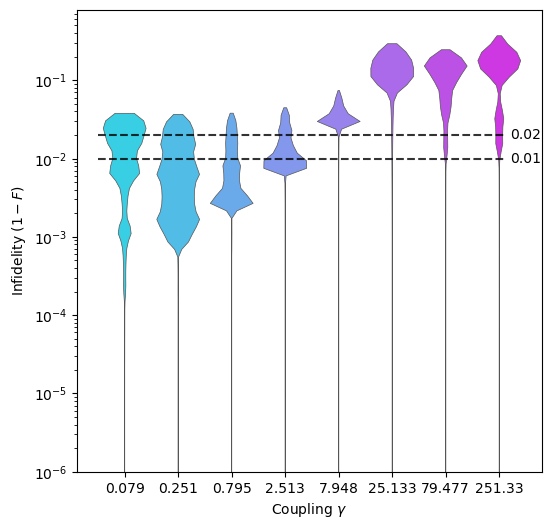

In [14]:
fig = log_infidelity_from_gamma(df, "")
fig.show()

In [15]:
fig.savefig("2Level_LogInfidelity_DMD_TS_POP_RND.pdf")